# Ejercicio Industria 4.0

En este ejercicio se intentará obtener unos resultados a partir de un dataset muy famoso de clasificación de música de spotify. Todos los imports necesarios ya estan añadidos en el siguiente código.


In [1]:
import sklearn
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Paso 1: Leer el dataset

In [2]:
dataset = pd.read_csv("OriginalDataset.csv")

## Paso 2: Revisar los campos

In [3]:
dataset.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


## Paso 3: Eliminar filas no utiles + filas con nulos

In [4]:
dataset = dataset.drop(columns=["instance_id", "artist_name", "track_name", "obtained_date"], inplace=False)
dataset = dataset.dropna()
dataset = dataset[~dataset.apply(lambda row: '?' in row.values, axis=1)]
# Coger el numero de clases
nClases = len(dataset.music_genre.unique())

## Paso 4: Transformar columnas categoricas en numericas

In [5]:
dataset = pd.get_dummies(dataset, columns=["mode","key"])

## Paso 5: Extraer la columna objetivo

In [6]:
targetCol = 'music_genre'
Y = dataset[targetCol]
X = dataset.drop([targetCol],axis=1)

## Paso 6: Particionar entre train i test

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=Y)

## Paso 7: Normalizar los datos

In [8]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Paso 8: Seleccionar y probar modelos

### SVM's

In [9]:
# Probar los kernels 'linear' y 'rbf'. Este último es más lento.
knc = SVC(kernel='linear')
knc.fit(X_train,Y_train)
pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test,pred))
print(sklearn.metrics.accuracy_score(Y_test,pred))
print(sklearn.metrics.classification_report(Y_test,pred))

[[388   3  24   3 201  66 131  52  36 220]
 [ 39 761  84 109  45  46   2  31   2   5]
 [ 51 121 590  16 107  44   2 139   1  47]
 [ 27  57  23 929   5  17   0  63   0   4]
 [ 77  21  81   0 621  32  31  57   8 194]
 [ 83  66  51  11  43 649  43 123  22  25]
 [ 50   0   4   0  28  14 635  10 325  64]
 [ 45  22 131  75  72 153  45 535   2  50]
 [ 64   0   1   0  17   8 539  10 346 141]
 [124   2   7   3 104  11  32  37  60 760]]
0.5521101732563305
              precision    recall  f1-score   support

 Alternative       0.41      0.35      0.37      1124
       Anime       0.72      0.68      0.70      1124
       Blues       0.59      0.53      0.56      1118
   Classical       0.81      0.83      0.82      1125
     Country       0.50      0.55      0.53      1122
  Electronic       0.62      0.58      0.60      1116
     Hip-Hop       0.43      0.56      0.49      1130
        Jazz       0.51      0.47      0.49      1130
         Rap       0.43      0.31      0.36      1126
        R

### Random forest

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test,pred))
print(sklearn.metrics.accuracy_score(Y_test,pred))
print(sklearn.metrics.classification_report(Y_test,pred))

[[380  10  32   5 157  56 103  69  57 255]
 [ 38 817  61  99  37  41   2  22   0   7]
 [ 54  98 624  17  79  53   3 135   1  54]
 [ 23  37  22 959   7  15   0  57   0   5]
 [ 76  17  58   1 659  12  14  48  31 206]
 [ 66  53  72   9  24 674  19 141  14  44]
 [ 64   1   2   0  15  11 445  12 538  42]
 [ 39  12 124  67  53 155  22 598  10  50]
 [ 61   0   1   0  15   3 621   9 317  99]
 [163   1  26   3 108  11  36  33  64 695]]
0.5480231008440694
              precision    recall  f1-score   support

 Alternative       0.39      0.34      0.36      1124
       Anime       0.78      0.73      0.75      1124
       Blues       0.61      0.56      0.58      1118
   Classical       0.83      0.85      0.84      1125
     Country       0.57      0.59      0.58      1122
  Electronic       0.65      0.60      0.63      1116
     Hip-Hop       0.35      0.39      0.37      1130
        Jazz       0.53      0.53      0.53      1130
         Rap       0.31      0.28      0.29      1126
        R

### Redes neuronales

Primero de todo hay que convertir la salida con One Hot Encoding.

In [11]:
Y_train = pd.get_dummies(pd.DataFrame(Y_train))
Y_test = pd.get_dummies(pd.DataFrame(Y_test))

Crea una red neuronal con 3 capas internas. La primera de ellas con 128 neuronas, la segunda con 64 y la tercera con 32. Recuerda terminar con una capa con el valor a clasificar.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(len(X.columns), ), activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(nClases, activation='linear'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 12,234
Trainable params: 12,234
Non-trainable params: 0
_________________________________________________________________


Entrena durante 15 epocas con una partición de validación de 0.1.

In [13]:
epochs = 15
validation_split = 0.10
history = model.fit(X_train, Y_train, epochs=epochs, validation_split=validation_split)

Epoch 1/15
950/950 [==============================] - 2s 1ms/step - loss: 5.4305 - accuracy: 0.0933 - val_loss: 5.0139 - val_accuracy: 0.0924
Epoch 2/15
950/950 [==============================] - 1s 1ms/step - loss: 4.3062 - accuracy: 0.0864 - val_loss: 3.6757 - val_accuracy: 0.0897
Epoch 3/15
950/950 [==============================] - 1s 1ms/step - loss: 3.5235 - accuracy: 0.0885 - val_loss: 3.3494 - val_accuracy: 0.0832
Epoch 4/15
950/950 [==============================] - 1s 1ms/step - loss: 3.2590 - accuracy: 0.0814 - val_loss: 3.0421 - val_accuracy: 0.0758
Epoch 5/15
950/950 [==============================] - 1s 1ms/step - loss: 3.0164 - accuracy: 0.0722 - val_loss: 2.8891 - val_accuracy: 0.0714
Epoch 6/15
950/950 [==============================] - 1s 1ms/step - loss: 2.8999 - accuracy: 0.0645 - val_loss: 2.8689 - val_accuracy: 0.0566
Epoch 7/15
950/950 [==============================] - 1s 1ms/step - loss: 2.8032 - accuracy: 0.0524 - val_loss: 2.6582 - val_accuracy: 0.0557
Epoch 

### Parece que functiona muy mal. A que se debe esto?
Las capas no tienen activación == activación linear.

Prueba a cambiar las functiones de activation de la red para que sean dos relu al principio y una softmax al final.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(len(X.columns), ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(nClases, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3328      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 12,234
Trainable params: 12,234
Non-trainable params: 0
_________________________________________________________________


Entrena durante 50 epocas con una partición de validación de 0.1.

In [15]:
epochs = 50
validation_split = 0.10
history = model.fit(X_train, Y_train, epochs=epochs, validation_split=validation_split)

Epoch 1/50
950/950 [==============================] - 2s 1ms/step - loss: 1.3555 - accuracy: 0.4903 - val_loss: 1.2218 - val_accuracy: 0.5327
Epoch 2/50
950/950 [==============================] - 1s 972us/step - loss: 1.1872 - accuracy: 0.5490 - val_loss: 1.1885 - val_accuracy: 0.5383
Epoch 3/50
950/950 [==============================] - 1s 988us/step - loss: 1.1494 - accuracy: 0.5583 - val_loss: 1.1701 - val_accuracy: 0.5455
Epoch 4/50
950/950 [==============================] - 1s 982us/step - loss: 1.1283 - accuracy: 0.5654 - val_loss: 1.1594 - val_accuracy: 0.5460
Epoch 5/50
950/950 [==============================] - 1s 1ms/step - loss: 1.1122 - accuracy: 0.5716 - val_loss: 1.1507 - val_accuracy: 0.5523
Epoch 6/50
950/950 [==============================] - 1s 1ms/step - loss: 1.0987 - accuracy: 0.5769 - val_loss: 1.1491 - val_accuracy: 0.5422
Epoch 7/50
950/950 [==============================] - 1s 1ms/step - loss: 1.0861 - accuracy: 0.5807 - val_loss: 1.1392 - val_accuracy: 0.5558


## Enseña las curvas de aprendizaje

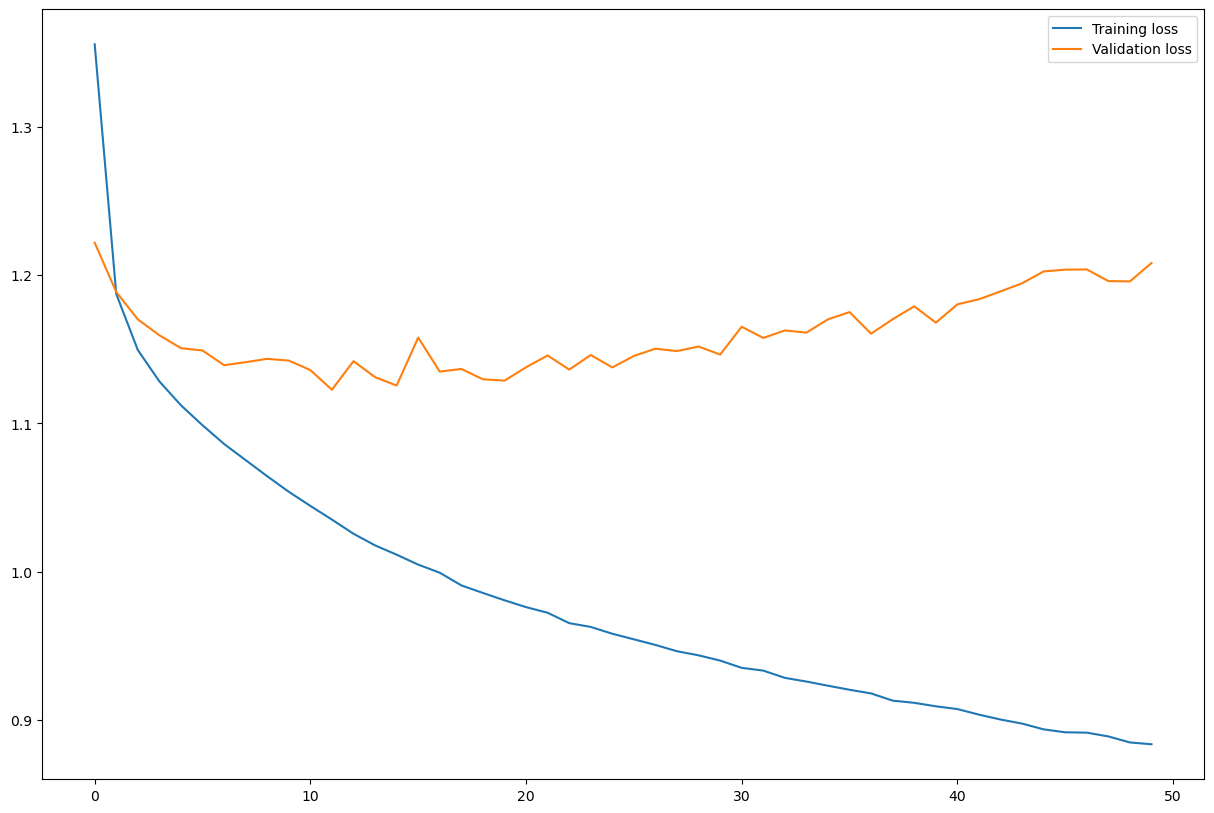

In [16]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.show()

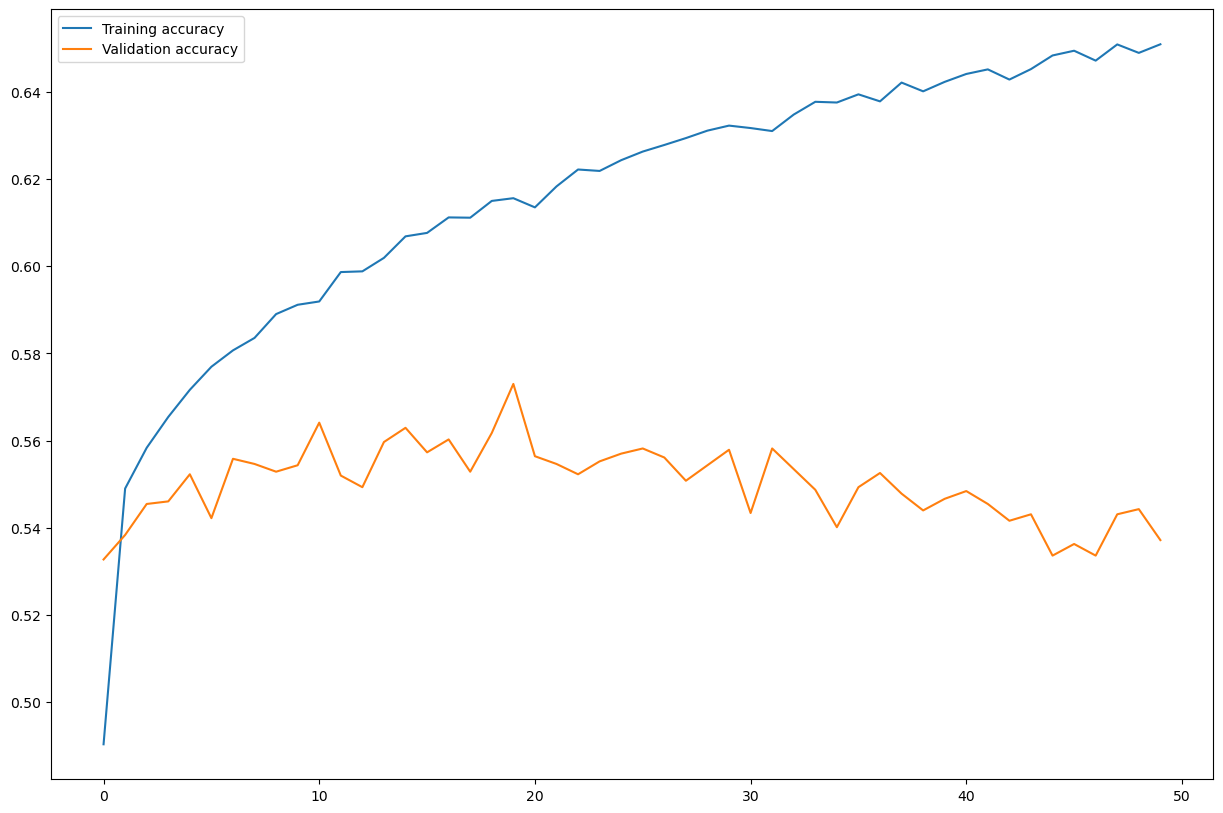

In [17]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.show()

## Evaluar el modelo

In [18]:
pred = model.predict(X_test)
import numpy as np
pred = np.argmax(pred, axis=1)
y_test = np.argmax(Y_test.values, axis=1)
print(sklearn.metrics.confusion_matrix(y_test,pred))
print(sklearn.metrics.accuracy_score(y_test,pred))
print(sklearn.metrics.classification_report(y_test,pred))

352/352 [==============================] - 0s 661us/step
[[382  17  32  10 182  87  98  35  73 208]
 [ 31 794  91  82  29  64   2  24   1   6]
 [ 51  92 588  30 109  70   6 125   1  46]
 [ 20  61  23 944   4  24   0  45   0   4]
 [ 79  20  83   2 649  34  29  48  19 159]
 [ 60  65  80  13  35 678  24 104  30  27]
 [ 48   0   4   1  13  27 656   8 327  46]
 [ 66  21 129  87  68 172  27 502   5  53]
 [ 48   1   0   0  14  16 617   4 339  87]
 [110   2  16   4 137  18  52  22 115 664]]
0.5505108840515327
              precision    recall  f1-score   support

           0       0.43      0.34      0.38      1124
           1       0.74      0.71      0.72      1124
           2       0.56      0.53      0.54      1118
           3       0.80      0.84      0.82      1125
           4       0.52      0.58      0.55      1122
           5       0.57      0.61      0.59      1116
           6       0.43      0.58      0.50      1130
           7       0.55      0.44      0.49      1130
      